#2차시 과제1번 풀이


#타이타닉 데이터 분석

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

# 시각화 스타일 설정
sns.set(style="whitegrid")

drive.mount('/content/drive')
#데이터 불러오기
titanic_df = pd.read_csv('/content/drive/MyDrive/02_Titanic_data.csv')

#데이터 저장하기
#df.to_csv('output.csv' , index=False)

titanic_df.info()
titanic_df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 생존자 기본 통계

In [6]:
# 생존자 기본 통계 분석

# 전체 생존율
total_survival_rate = titanic_df['Survived'].mean()

# 성별에 따른 생존율
gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()

# 선실 등급(Pclass)에 따른 생존율
pclass_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

# 결과 정리
{
    "전체 생존율": total_survival_rate,
    "성별 생존율": gender_survival_rate,
    "선실 등급별 생존율": pclass_survival_rate
}

{'전체 생존율': np.float64(0.3838383838383838),
 '성별 생존율': Sex
 female    0.742038
 male      0.188908
 Name: Survived, dtype: float64,
 '선실 등급별 생존율': Pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: Survived, dtype: float64}

In [8]:
import numpy as np

# 1. 객실 등급(Pclass)별 승객 수 분석
passenger_count_by_class = titanic_df['Pclass'].value_counts().sort_index()

# 2. 승객 중 최고 연장자 정보
oldest_passenger = titanic_df.loc[titanic_df['Age'].idxmax()]

# 3. 성별 비율 계산
gender_ratio = titanic_df['Sex'].value_counts(normalize=True) * 100

# 결과 정리
result = {
    "객실 등급별 승객 수": passenger_count_by_class.to_dict(),
    "최고 연장자": {
        "이름": oldest_passenger['Name'],
        "나이": oldest_passenger['Age'],
        "성별": oldest_passenger['Sex'],
        "객실 등급": oldest_passenger['Pclass'],
        "생존 여부": "생존" if oldest_passenger['Survived'] == 1 else "사망"
    },
    "성별 비율 (%)": gender_ratio.round(2).to_dict()
}

result

{'객실 등급별 승객 수': {1: 216, 2: 184, 3: 491},
 '최고 연장자': {'이름': 'Barkworth, Mr. Algernon Henry Wilson',
  '나이': np.float64(80.0),
  '성별': 'male',
  '객실 등급': np.int64(1),
  '생존 여부': '생존'},
 '성별 비율 (%)': {'male': 64.76, 'female': 35.24}}

## 사망자, 생존자


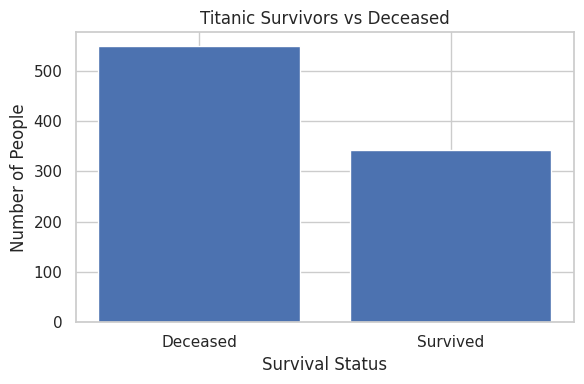

In [ ]:
# 생존자수
survival_counts = titanic_df['Survived'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['Deceased', 'Survived'], survival_counts)
plt.title('Titanic Survivors vs Deceased')
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

사망자 수가 생존자 수보다 약 2배 많습니다.
전체적으로 생존률이 낮았다는 점을 확인할 수 있습니다.

## 성별 생존자 수

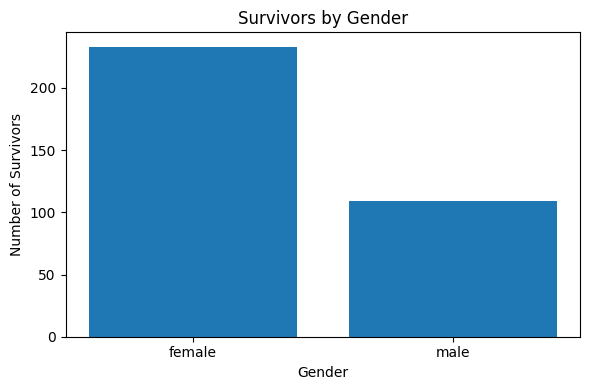

In [ ]:
# 성별 생존자 수
gender_survival = titanic_df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(6, 4))
plt.bar(gender_survival.index, gender_survival.values)
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.tight_layout()
plt.show()

여성의 생존율이 남성보다 훨씬 높았음을 알 수 있습니다. 여성과 아이를 먼저 구조하면서 여성 생존율이 높지 않았나 예상합니다.

## 승객 나이 분포

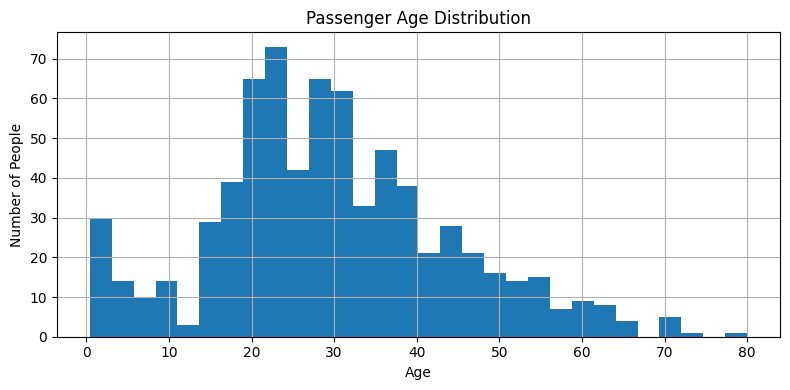

In [ ]:
# 나이 분포
plt.figure(figsize=(8, 4))
titanic_df['Age'].dropna().hist(bins=30)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

20대에서 30대가 가장 많은 것을 확인 할 수 있습니다.

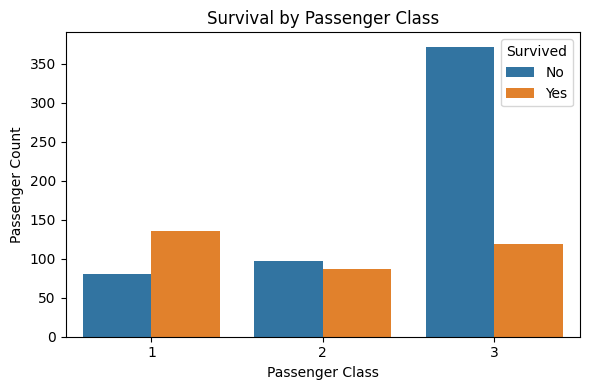

In [ ]:
# 좌석 등급에 따른 생존자 수 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

1등석(Pclass=1) 탑승객은 생존자 비율이 높습니다.
2등석(Pclass=2)는 생존과 사망이 비슷하게 분포합니다.
3등석(Pclass=3) 탑승객은 사망자 수가 월등히 많습니다.

좌석 등급이 높을수록 생존 가능성이 높았습니다.